In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('/home/sdr/Downloads')
main_set=pd.read_excel('dataset.xls')
main_set.shape

(30000, 25)

In [2]:
main_set.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [3]:
x=main_set.iloc[:,1:25].values
y=main_set.iloc[:,-1].values
#print(x)
#print(y)
#pd.DataFrame(x).info()

In [4]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x=std.fit_transform(x)
x

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.31413612,
        -0.29338206,  1.87637834],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.31413612,
        -0.18087821,  1.87637834],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24868274,
        -0.01212243, -0.53294156],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.18322937,
        -0.11900109,  1.87637834],
       [-0.67427636, -1.23432296,  1.45111372, ...,  3.15253642,
        -0.19190359,  1.87637834],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24868274,
        -0.23713013,  1.87637834]])

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
pd.DataFrame(y_train)

,0
0,0
1,0
2,0
3,0
4,0
...,...
23995,0
23996,0
23997,0
23998,1


In [7]:
from sklearn.linear_model import LogisticRegression
train=LogisticRegression().fit(x_train,y_train)

In [8]:
train.coef_

array([[-5.96502891e-02, -1.61810834e-02, -2.96495883e-02,
        -3.34264610e-02,  3.16720395e-02,  2.23577805e-01,
         5.88425023e-02,  4.13745345e-02,  1.68123741e-02,
         1.20474231e-02,  9.27871070e-03, -4.00456200e-02,
        -1.55966615e-02, -3.68289093e-03,  8.58527664e-03,
         4.16955469e-03, -1.12873374e-03, -5.11261459e-02,
        -4.95853814e-02, -1.43797331e-02, -2.18785647e-02,
        -2.35884684e-02, -1.77879694e-02,  6.72026726e+00]])

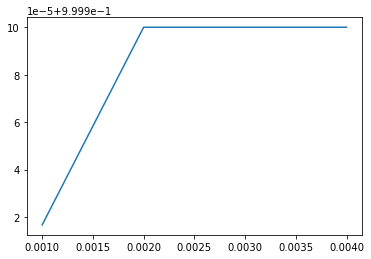

In [9]:
from sklearn.model_selection import cross_val_score
lambdaval = np.arange(0.001,0.005,0.001)
cv_scores=[]
for l in lambdaval:
    train = LogisticRegression(C=l)
    scores = cross_val_score(train,x_train,y_train,cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1-x for x in cv_scores]
MSE

optimal_l = lambdaval[MSE.index(min(MSE))]
optimal_l

plt.plot(lambdaval,cv_scores)

In [10]:
cv_scores

[0.9999166666666668, 1.0, 1.0, 1.0]

In [28]:
optimal_l

0.002

# with L1 Regularisation

In [12]:
regression= LogisticRegression(penalty='l1',C=optimal_l,max_iter=100,solver='saga')
regression.fit(x_train,y_train)

/home/sdr/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.002, max_iter=10, penalty='l1', solver='saga')

In [13]:
regression.coef_

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.80197827]])

In [14]:
y_pred_test = regression.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred_test)

1.0

In [17]:
y_pred_train = regression.predict(x_train)
accuracy_score(y_train,y_pred_train)

1.0

# With l2 Regularisation

In [35]:
regression_l2= LogisticRegression(penalty='l2',C=optimal_l,max_iter=10000,solver='saga')
regression_l2.fit(x_train,y_train)

LogisticRegression(C=0.002, max_iter=10000, solver='saga')

In [31]:
regression_l2.coef_

array([[-5.30635578e-02, -1.51824045e-02, -1.82535757e-02,
        -2.75897858e-02,  2.46102275e-02,  1.81468804e-01,
         6.79186259e-02,  4.56961950e-02,  2.63643027e-02,
         1.99854539e-02,  1.80668810e-02, -2.33535254e-02,
        -1.36863227e-02, -9.98730932e-03, -2.20247891e-03,
        -1.22360638e-03, -1.82778134e-03, -4.37258618e-02,
        -3.71340207e-02, -1.45914198e-02, -2.36233565e-02,
        -2.27869782e-02, -2.13428394e-02,  2.36825323e+00]])

In [36]:
y_pred_l2 = regression.predict(x_test)
y_pred_l2

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
y_test
regression_l2.intercept_

array([-2.32491512])

In [37]:
y_pred_train_l2 = regression.predict(x_train)
accuracy_score(y_train,y_pred_train_l2)

1.0